# **US Baby Names 1880–2010**

## **1. Định nghĩa vấn đề**

**Mô tả**:
+ Bộ dữ liệu được chia thành các tệp theo từng năm (yob1880.txt đến yob2010.txt). Mỗi tệp chứa hàng nghìn mẫu (dòng), với tổng cộng hàng triệu mẫu trên toàn bộ các tệp (yob1880.txt đến yob2010.txt).

+ Mỗi dòng (mẫu) thể hiện một tên duy nhất cho một giới tính cụ thể trong năm đó và số lượng trẻ được đặt tên đó.

+ Có 3 trường dữ liệu (cột) trong mỗi tệp, và các tệp gốc không có tiêu đề (header). Khi đọc dữ liệu phải gán tên cho chúng: Tên (Name, kiểu chuỗi), Giới tính (Sex, 'F' cho Nữ hoặc 'M' cho Nam), và Số lượng sinh (Birth, số nguyên).

**Dữ liệu đầu vào ban đầu (Tên cột chúng ta gán khi đọc):**
  + name
  + sex
  + births

**Dữ liệu đầu ra không có một cột "Đầu ra" cố định. Thay vào đó, có thể tạo ra các đầu ra (insights) bằng cách đặt câu hỏi cho dữ liệu:**
  + Xu hướng phổ biến của một tên
  + Tổng số ca sinh mỗi năm
  + Tỷ lệ của một tên (so với tổng số)

## **2. Tổng quan về dữ liệu**

### (1) Cài đặt thư viện và kết nối bộ dữ liệu

In [ ]:
import pandas as pd
import numpy as np
import os
import glob
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor
from matplotlib.ticker import MaxNLocator

# 1. Chỉ định đường dẫn đến thư mục chứa dữ liệu
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### (2) Nhập bộ dữ liệu

In [ ]:
# 1. Chỉ định đường dẫn
path = '/content/drive/My Drive/dataset/babynames'

# 2. Lấy danh sách tất cả các tệp .txt
all_files = glob.glob(os.path.join(path, "yob*.txt"))

# --- (TÙY CHỌN NHƯNG NÊN CÓ) SẮP XẾP DANH SÁCH TỆP ---
# Giúp quá trình đọc dễ đoán hơn (phục vụ sắp xếp tăng dần)
all_files.sort()
# ----------------------------------------------------

if not all_files:
    print(f"Không tìm thấy tệp .txt nào tại đường dẫn: {path}")
else:
    print(f"Đã tìm thấy {len(all_files)} tệp. Bắt đầu đọc...")

    pieces = []

    # 4. Vòng lặp qua từng tệp tin
    for file_path in all_files:
        df_temp = pd.read_csv(
            file_path,
            names=['name', 'sex', 'births']
        )

        filename = os.path.basename(file_path)
        year = int(filename[3:7])
        df_temp['year'] = year

        pieces.append(df_temp)

    # 5. Gộp tất cả các DataFrame
    data = pd.concat(pieces, ignore_index=True)

    # --- SỬA LỖI Ở ĐÂY: SẮP XẾP LẠI TOÀN BỘ DATA FRAME ---
    # Sắp xếp theo Năm (tăng dần), rồi Giới tính, rồi Số lượng (giảm dần)
    data = data.sort_values(by=['year', 'sex', 'births'], ascending=[True, True, False])
    data = data.reset_index(drop=True) # Đặt lại chỉ số sau khi sắp xếp
    # ------------------------------------------------------

    # 6. Hiển thị kết quả
    print("\nĐã gộp và sắp xếp xong! Đây là thông tin tổng quan:")
    print(data.info())

    # --- CẬP NHẬT CÁCH IN (ĐỂ LUÔN LUÔN ĐÚNG) ---
    min_year = data['year'].min()
    max_year = data['year'].max()

    print(f"\n--- 5 dòng đầu tiên (Năm: {min_year}) ---")
    print(data.head())

    print(f"\n--- 5 dòng cuối cùng (Năm: {max_year}) ---")
    print(data.tail())

Đã tìm thấy 131 tệp. Bắt đầu đọc...

Đã gộp và sắp xếp xong! Đây là thông tin tổng quan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692484 entries, 0 to 1692483
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   name    object
 1   sex     object
 2   births  int64 
 3   year    int64 
dtypes: int64(2), object(2)
memory usage: 51.7+ MB
None

--- 5 dòng đầu tiên (Năm: 1880) ---
        name sex  births  year
0       Mary   F    7065  1880
1       Anna   F    2604  1880
2       Emma   F    2003  1880
3  Elizabeth   F    1939  1880
4     Minnie   F    1746  1880

--- 5 dòng cuối cùng (Năm: 2010) ---
              name sex  births  year
1692479    Zymaire   M       5  2010
1692480     Zyonne   M       5  2010
1692481  Zyquarius   M       5  2010
1692482      Zyran   M       5  2010
1692483      Zzyzx   M       5  2010


## **3. Phân tích khám phá dữ liệu**

**Mục tiêu**:
+ Quan sát kích cỡ dữ liệu (số lượng hàng và cột) và kiểu dữ liệu
+ Tính toàn vẹn dữ liệu
+ Kiểm tra Nan/Null
+ Xử lý giá trị rỗng/thiếu
+ Tần suất xuất hiện

### (1) Nhìn sơ lược về dữ liệu

In [ ]:
data

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1692479,Zymaire,M,5,2010
1692480,Zyonne,M,5,2010
1692481,Zyquarius,M,5,2010
1692482,Zyran,M,5,2010


In [ ]:
# Số dòng và cột
print(f'+ Shape: {data.shape}')

+ Shape: (1692484, 4)


Bộ dữ liệu gồm 1692484 dòng (1 dòng đại diện cho tên của đứa trẻ) và 4 cột dữ liệu(name, sex, count, year)

In [ ]:
# head, tail để xem 5 dòng đầu và 5 dòng cuối dữ liệu
print("5 dòng đầu và 5 dòng cuối dữ liệu:\n")
print(f'+ Contents: ')
display(data.head(5))
display(data.tail(5))

5 dòng đầu và 5 dòng cuối dữ liệu:

+ Contents: 


,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


,name,sex,births,year
1692479,Zymaire,M,5,2010
1692480,Zyonne,M,5,2010
1692481,Zyquarius,M,5,2010
1692482,Zyran,M,5,2010
1692483,Zzyzx,M,5,2010


Bộ dữ liệu được sắp xếp tăng dần theo các năm (1880 đến 2010) dựa vào cột 'year'

In [ ]:
# info để xem thông tin dữ liệu Tên cột (Column) Số lượng giá trị không rỗng Non-Null Count (missing values/NaN).Kiểu dữ liệu (Dtype)
print("Thông tin dữ liệu:\n")
print(f'+ Info: \n{data.info()}')

Thông tin dữ liệu:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692484 entries, 0 to 1692483
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   name    object
 1   sex     object
 2   births  int64 
 3   year    int64 
dtypes: int64(2), object(2)
memory usage: 51.7+ MB
+ Info: 
None


**Dữ liệu rất "sạch" và sẵn sàng để phân tích:**

+ Tổng cộng gần 1.692.484 dòng đã được tải thành công.

+ Không có dữ liệu bị thiếu (null).

+ Các kiểu dữ liệu (Dtypes) đều chính xác: name và sex là object (chuỗi), count và year là int64 (số nguyên)

### (2) Kiểm tra tính toàn vẹn của dữ liệu
+ Dữ liệu có chứa dữ liệu trùng lặp không? Hiển thị các hàng vi phạm.
+ Dữ liệu có chứa giá trị Null không? Hiển thị các hàng vi phạm.
+ Dữ liệu có chứa giá trị NaN không? Hiển thị các hàng vi phạm.

In [ ]:
from typing_extensions import dataclass_transform
# Kiểm tra dữ liệu null, nan, trùng lặp(duplicated) và dữ liệu thiếu
has_null = data.isnull().sum().any()
has_nan  = data.isna().sum().any()
n_duplicated = data.duplicated().sum()
has_missing_values = data.isnull().sum().any()


print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(data[data.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(dataclass_transform[data.isna().any(axis=1)])
print(f'+ Số dòng trùng: {n_duplicated}')
if has_missing_values:
    print('   -> Các dòng chứa giá trị thiếu:')
    display.display(data[data.isnull().any(axis=1)])

# Kiểm tra và hiển thị các dòng bị trùng lặp
print(f'+ Số dòng bị trùng lặp: {n_duplicated}')
if n_duplicated > 0:
    print('   -> Các dòng bị trùng lặp (bao gồm cả dòng gốc để đối chiếu):')
    # Sử dụng keep=False để hiển thị tất cả các bản sao của một dòng bị lặp
    display.display(data[data.duplicated(keep=False)])

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị Nan: False
+ Số dòng trùng: 0
+ Số dòng bị trùng lặp: 0


### (3) Xử lý giá trị rỗng, không hợp lệ

In [ ]:
# + Xóa bỏ cột vi phạm
# df_train.drop("cột_vi_phạm", axis=1)

# + Xóa bỏ các dòng vi phạm
# df_train.dropna(subset=["cột_vi_phạm", ...])

# + Điền giá trị mặc định:
# median = df_train["cột_vi_phạm"].median()
# df_train["cột_vi_phạm"].fillna(median, inplace=True)

print("="*5, "Null Value", "="*5)
display(data.isnull().sum())

print("="*5, "Checking NaN", "="*5)
display(data.isna().sum())

===== Null Value =====


,0
name,0
sex,0
births,0
year,0


===== Checking NaN =====


,0
name,0
sex,0
births,0
year,0


Bộ dữ liệu không chứa giá trị Null/NaN của từng dòng thuộc các cột dữ liệu

### (4) Tính chất thống kê trên dữ liệu số
+ Số lượng, Trung bình, Độ lệch chuẩn, Giá trị nhỏ nhất
+ Phân vị thứ 25, Phân vị thứ 50 (Trung vị), Phân vị thứ 75, Giá trị lớn nhất

In [ ]:
description = data.describe().T
display(description)

,count,mean,std,min,25%,50%,75%,max
births,1692484.0,190.634691,1615.922978,5.0,7.0,12.0,32.0,99693.0
year,1692484.0,1969.475840,32.819578,1880.0,1946.0,1979.0,1997.0,2010.0


Cột year: Đã tải đúng dữ liệu, min là 1880 và max là 2010.

Cột count (Số lượng):

+ min = 5.0: Điều này cho thấy bộ dữ liệu gốc (từ Cục An sinh Xã hội) chỉ ghi lại các tên xuất hiện ít nhất 5 lần trong một năm.

+ 50% (Trung vị) = 12.0: Một nửa số tên trong toàn bộ lịch sử này chỉ có 12 lượt đặt hoặc ít hơn.

+ mean (Trung bình) = 190.6: Giá trị trung bình cao hơn nhiều so với trung vị.

+ max = 99,683: Có ít nhất một tên trong một năm nào đó cực kỳ phổ biến.

Kết luận thực tế: Dữ liệu bị lệch rất nặng (positively skewed). Hầu hết các tên (75%) đều có số lượng rất ít (dưới 32), nhưng một số ít tên "siêu sao" lại có số lượng khổng lồ, kéo giá trị trung bình lên cao.

### (5) Tần suất xuất hiện từng tên trong dữ liệu "name"

In [ ]:
data["name"].value_counts()

,count
name,
Ollie,262
Jesse,262
Marion,262
Leslie,262
Johnnie,262
...,...
Minhtri,1
Mirsab,1
Motley,1


Hiểu sai về "Count": Cột count ở đây (ví dụ: 262) không phải là số lượng em bé. Nó có nghĩa là tên "Ollie" xuất hiện trong 262 dòng khác nhau trong toàn bộ 1.7 triệu dòng dữ liệu.Ý nghĩa của 262 (Max): Bộ dữ liệu kéo dài 131 năm (1880-2010).

Con số 262 chính là $131 \text{ năm} \times 2 \text{ giới tính}$. Điều này cho thấy các tên top đầu (Ollie, Jesse, Marion) là những cái tên unisex (lưỡng tính) bền bỉ nhất, chúng xuất hiện cho cả Nam và Nữ trong gần như mỗi năm.Ý nghĩa của 1 (Min): Rất nhiều tên (như "Minhtri", "Oluwamayomikun") chỉ có số đếm là 1.

Điều này có nghĩa chúng là những tên "độc lạ" (one-hit wonders), chỉ xuất hiện trong một dòng duy nhất (ví dụ: chỉ xuất hiện cho Nam vào năm 1995) và không bao giờ lặp lại ở bất kỳ năm nào hoặc giới tính nào khác.

Độ đa dạng: Có tổng cộng 88,656 cách viết/đặt tên (spellings) khác nhau, cho thấy sự đa dạng tên gọi cực kỳ lớn qua 131 năm.

## **4. Mô hình hóa dữ liệu (EDA)**

### (1) Phân tích các xu hướng đặt tên

/tmp/ipython-input-3174757021.py:6: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_births_full = data.pivot_table("births", index="year",



Đã lưu biểu đồ thành file 'selected_names_birth_trends.png'


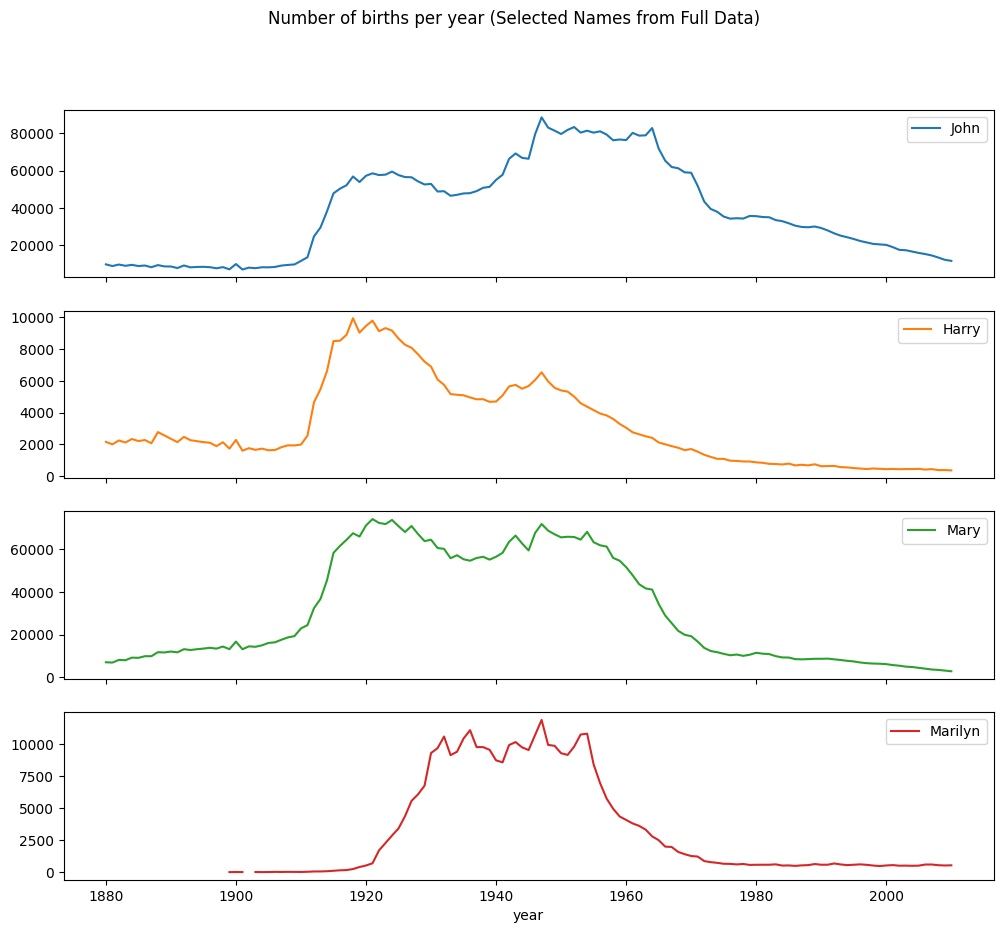

In [ ]:

boys = data[data["sex"] == "M"]

girls = data[data["sex"] == "F"]

# Lưu ý: Pivot table này sẽ lớn hơn nhiều vì dùng toàn bộ dữ liệu
total_births_full = data.pivot_table("births", index="year",
                                   columns="name",
                                   aggfunc=sum)

subset_names = ["John", "Harry", "Mary", "Marilyn"]
# Kiểm tra xem các cột có tồn tại không trước khi chọn
existing_names_subset = [name for name in subset_names if name in total_births_full.columns]
if not existing_names_subset:
    print(f"Không tìm thấy tên nào trong {subset_names} trong dữ liệu.")
else:
    subset = total_births_full[existing_names_subset]

    # In [129]: Vẽ biểu đồ cho tập hợp con
    # subplot=True vẽ mỗi tên trên một biểu đồ riêng
    # grid=False để loại bỏ lưới nền (tùy chọn thẩm mỹ)
    subset.plot(subplots=True, figsize=(12, 10), grid=False,
                title="Number of births per year (Selected Names from Full Data)")

    # Lưu biểu đồ thành file ảnh (tùy chọn)
    plt.savefig('selected_names_birth_trends.png')
    print("\nĐã lưu biểu đồ thành file 'selected_names_birth_trends.png'")

    # plt.show() # Dùng plt.show() nếu chạy code cục bộ, không cần trong Colab/VM này

**nhận xét ngắn gọn về biểu đồ:**

+ **Xu hướng biến động:** Biểu đồ cho thấy sự thay đổi rõ rệt về mức độ phổ biến (số lượng sinh tuyệt đối) của bốn tên ("John", "Harry", "Mary", "Marilyn") trong giai đoạn 1880-2010.

+ **Ảnh hưởng Baby Boom:** Các tên "John" và "Mary" đạt đỉnh cao phổ biến rõ rệt trong thời kỳ Baby Boom (khoảng 1945-1960). "Harry" cũng có một đỉnh nhỏ hơn trong giai đoạn này.

+ **Ảnh hưởng văn hóa:** Tên "Marilyn" gần như không xuất hiện cho đến những năm 1920, sau đó tăng vọt và đạt đỉnh vào những năm 1950 (trùng với thời kỳ nổi tiếng đỉnh cao của Marilyn Monroe), rồi giảm nhanh chóng. Điều này cho thấy ảnh hưởng mạnh mẽ của văn hóa đại chúng lên việc đặt tên. 🌟

+ **Suy giảm gần đây:** Cả bốn tên đều cho thấy xu hướng giảm đáng kể về số lượng tuyệt đối vào cuối giai đoạn (từ khoảng 1960 trở đi), phản ánh sự đa dạng hóa ngày càng tăng trong việc lựa chọn tên cho trẻ em. 👇


### (2) Đo lường sự tăng đa dạng trong đặt tên

In [ ]:
# Thêm cột 'rank' bằng cách xếp hạng 'births' trong từng nhóm (year, sex)
data['rank'] = data.groupby(['year', 'sex'])['births'].rank(method='first', ascending=False)

In [ ]:
# Tính tỷ lệ sinh theo từng tên so với tổng số trẻ sinh ra trong năm đó theo giới tính
data['prop'] = data.groupby(['year', 'sex'])['births'].transform(lambda x: x / x.sum())

# Tạo DataFrame top1000_data
top1000_data = data[data['rank'] <= 1000].copy()

--- Bảng tổng hợp tỷ lệ top 1000 ---


sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2006,0.753016,0.860273
2007,0.745831,0.855074
2008,0.740790,0.849958



Đã lưu biểu đồ thành file 'top1000_proportion_trends.png'


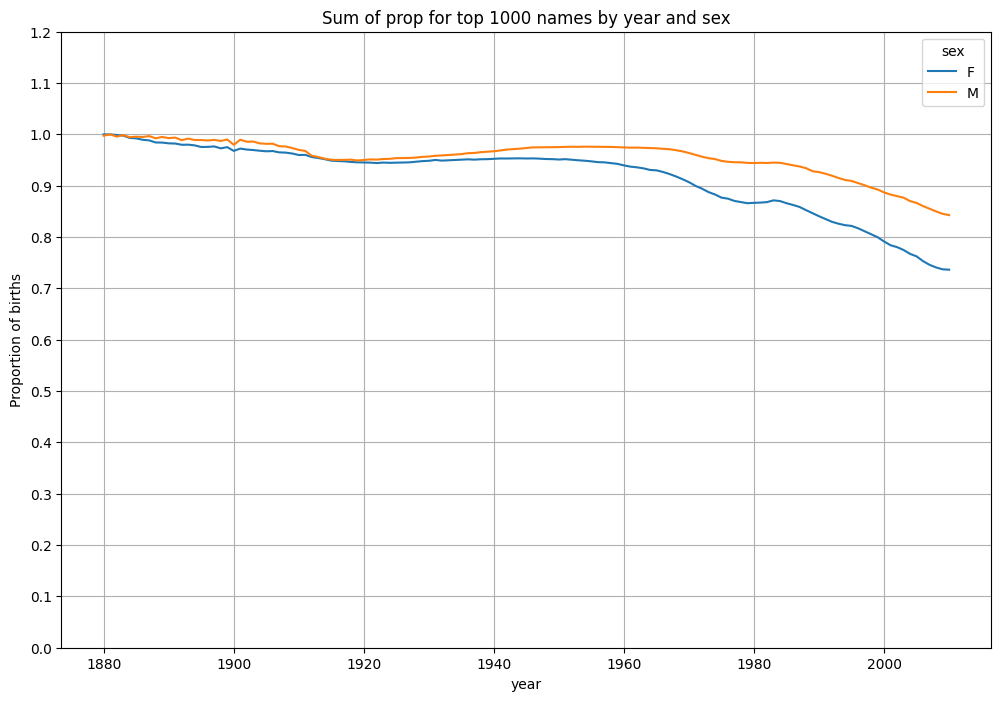

In [ ]:

# 1. Lọc ra top 1000 tên phổ biến nhất cho mỗi năm và giới tính
# Chúng ta đã tạo cột 'rank' ở bước trước
top1000_data = data[data['rank'] <= 1000]

# Kiểm tra xem có dữ liệu top 1000 không
if top1000_data.empty:
    print("Không tìm thấy dữ liệu top 1000. Hãy đảm bảo cột 'rank' đã được tính toán chính xác.")
else:
    # In [131]: Tạo pivot table tổng hợp tỷ lệ (prop) của top 1000 tên
    # theo năm và giới tính
    table_prop_top1000 = top1000_data.pivot_table("prop", index="year",
                                                 columns="sex", aggfunc="sum") # Sử dụng "sum" thay vì sum

    # Kiểm tra pivot table (tùy chọn)
    print("--- Bảng tổng hợp tỷ lệ top 1000 ---")
    display(table_prop_top1000)

    # In [132]: Vẽ biểu đồ
    # Tạo các điểm chia cho trục y từ 0 đến 1.2 với 13 điểm (khoảng cách 0.1)
    yticks = np.linspace(0, 1.2, 13)

    table_prop_top1000.plot(title="Sum of prop for top 1000 names by year and sex",
                            yticks=yticks,
                            figsize=(12, 8), # Tăng kích thước để dễ đọc hơn
                            grid=True) # Thêm lưới nền

    # Tùy chỉnh thêm cho biểu đồ
    plt.ylabel("Proportion of births") # Thêm nhãn trục y rõ ràng hơn
    plt.ylim(0, 1.2) # Đảm bảo giới hạn trục y đúng

    # Lưu biểu đồ thành file ảnh
    plt.savefig('top1000_proportion_trends.png')
    print("\nĐã lưu biểu đồ thành file 'top1000_proportion_trends.png'")

    # plt.show() # Không cần thiết trong môi trường này

**nhận xét ngắn gọn về biểu đồ:**

+ **Xu hướng chính:** Biểu đồ cho thấy rõ ràng rằng sự đa dạng trong việc đặt tên ngày càng tăng theo thời gian cho cả hai giới tính. 📈

+ **Quá khứ:** Vào cuối thế kỷ 19 (khoảng 1880), 1000 tên phổ biến nhất chiếm gần như toàn bộ (gần 100%) số lượng trẻ em được sinh ra, cho thấy sự tập trung cao độ vào các tên thông thường.

+ **Hiện tại:** Tỷ lệ này giảm dần, đặc biệt là từ giữa thế kỷ 20 trở đi. Đến năm 2010, 1000 tên phổ biến nhất chỉ chiếm khoảng 75% số bé gái và khoảng 85% số bé trai.

+ **Khác biệt giới tính:** Xu hướng đa dạng hóa tên gọi mạnh mẽ hơn ở bé gái so với bé trai, thể hiện qua đường biểu đồ ('F') dốc xuống nhanh hơn đường ('M') trong những thập kỷ gần đây.

### (3) Tổng hợp dữ liệu theo cấp độ năm('year') và giới tính('sex') (sử dụng pivot_table)

/tmp/ipython-input-390346946.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_births = data.pivot_table("births", index="year", columns="sex", aggfunc=sum)


sex         F        M
year                  
2006  1900673  2054644
2007  1921941  2074707
2008  1890111  2039317
2009  1836214  1982609
2010  1776636  1917792


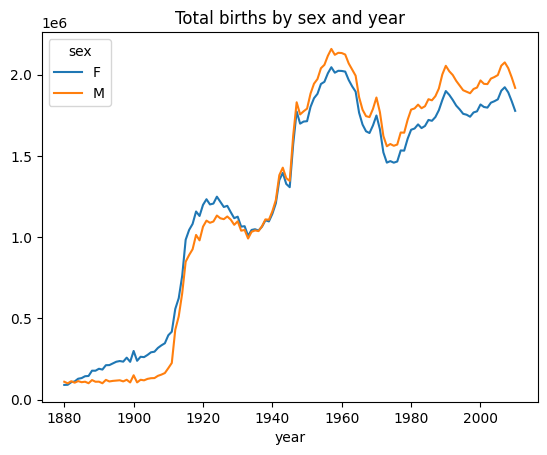

In [ ]:
# In [112]: Tạo pivot table
total_births = data.pivot_table("births", index="year", columns="sex", aggfunc=sum)

# In [113]: Hiển thị 5 dòng cuối của bảng (tùy chọn)
print(total_births.tail())

# In [114]: Vẽ biểu đồ
total_births.plot(title="Total births by sex and year")

# Hiển thị biểu đồ
plt.show()

**Biểu đồ trực quan hóa kết quả này, cho thấy:**

+ Xu hướng sinh tăng dần từ 1880 đến 2010.

+ Có một đợt bùng nổ sinh (baby boom) rõ rệt đạt đỉnh vào khoảng năm 1960.

+ Một quan sát thú vị là đường 'M' (Nam) luôn nằm trên đường 'F' (Nữ), cho thấy số lượng bé trai sinh ra hàng năm luôn cao hơn một chút so với bé gái.

### (4) Số lượng tên phổ biến trong top 50% (50% số lượng người có tên này bao gồm nam('M') và nữ('F') )

In [ ]:

# Kiểm tra lại xem top1000_data có tồn tại và không rỗng không
if 'top1000_data' not in locals() or top1000_data.empty:
    print("DataFrame 'top1000_data' chưa được tạo hoặc rỗng.")
    print("Đang tạo lại 'top1000_data' từ 'data'...")
    if 'rank' in data.columns:
        top1000_data = data[data['rank'] <= 1000].copy() # Dùng .copy() để tránh SettingWithCopyWarning
        if top1000_data.empty:
            print("Không thể tạo 'top1000_data'. Kiểm tra lại cột 'rank'.")
            # Gán DataFrame rỗng để tránh lỗi sau đó nếu không tạo được
            diversity = pd.DataFrame()
        else:
            print("'top1000_data' đã được tạo lại.")
    else:
        print("Cột 'rank' không tồn tại trong 'data'. Không thể tạo 'top1000_data'.")
        # Gán DataFrame rỗng để tránh lỗi sau đó nếu không tạo được
        diversity = pd.DataFrame()
else:
    print("'top1000_data' đã tồn tại.")

# Chỉ thực hiện tính toán nếu top1000_data hợp lệ
if 'diversity' not in locals() or diversity.empty: # Kiểm tra nếu diversity chưa được tạo hoặc rỗng
    if 'top1000_data' in locals() and not top1000_data.empty:
        # In [141]: Định nghĩa hàm tính số lượng tên đạt quantile q
        def get_quantile_count(group, q=0.5):
            # Sắp xếp nhóm theo tỷ lệ giảm dần
            group = group.sort_values("prop", ascending=False)
            # Tính tổng tích lũy của tỷ lệ và tìm vị trí cần chèn q
            # searchsorted trả về chỉ số (bắt đầu từ 0)
            # Cộng 1 để ra số lượng tên
            return group.prop.cumsum().searchsorted(q, side='right') + 1 # side='right' xử lý trường hợp bằng q

        # In [142]: Áp dụng hàm cho từng nhóm năm/giới tính trong top1000_data
        print("Đang tính toán độ đa dạng...")
        diversity_series = top1000_data.groupby(["year", "sex"]).apply(get_quantile_count, q=0.5) # Truyền q=0.5 tường minh

        # Chuyển đổi Series kết quả thành DataFrame (unstack)
        diversity = diversity_series.unstack('sex') # Chỉ định cột cần unstack

        # In [143]: Hiển thị 5 dòng đầu của kết quả (tùy chọn)
        print("\n--- 5 dòng đầu của DataFrame 'diversity' ---")
        display(diversity.head())
    else:
        print("Không thể tính toán 'diversity' do thiếu 'top1000_data'.")

'top1000_data' đã tồn tại.



Đang vẽ biểu đồ độ đa dạng...
Đã lưu biểu đồ thành file 'name_diversity_top50_percent.png'


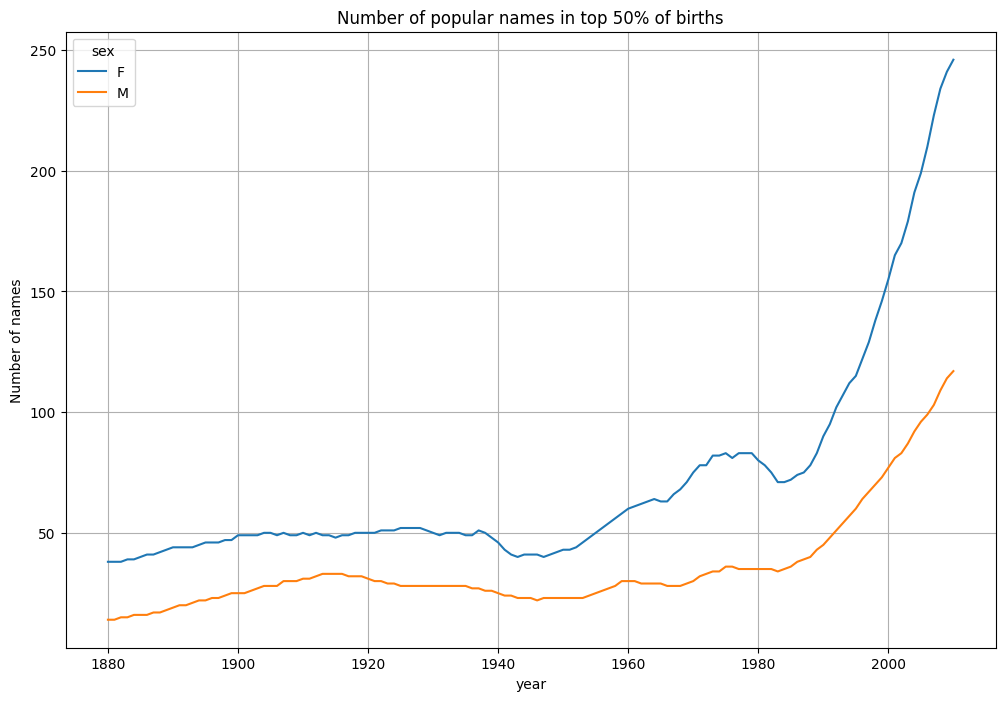

In [ ]:

# Kiểm tra xem DataFrame 'diversity' đã được tính toán thành công chưa
if 'diversity' in locals() and not diversity.empty:
    # In [144]: Vẽ biểu đồ từ DataFrame 'diversity'
    print("\nĐang vẽ biểu đồ độ đa dạng...")
    diversity.plot(title="Number of popular names in top 50% of births",
                   figsize=(12, 8), # Tăng kích thước
                   grid=True) # Thêm lưới

    # Tùy chỉnh thêm
    plt.ylabel("Number of names") # Thêm nhãn trục y

    # Lưu biểu đồ
    plt.savefig('name_diversity_top50_percent.png')
    print("Đã lưu biểu đồ thành file 'name_diversity_top50_percent.png'")

    # plt.show() # Không cần thiết trong môi trường này
else:
    print("Không thể vẽ biểu đồ vì DataFrame 'diversity' không tồn tại hoặc rỗng.")

**nhận xét về biểu đồ:**

+ **Xác nhận xu hướng:** Biểu đồ này xác nhận mạnh mẽ rằng sự đa dạng trong việc đặt tên đang tăng lên đáng kể theo thời gian cho cả hai giới.

+ **Ý nghĩa:** Cần ngày càng nhiều tên hơn để chiếm được 50% tổng số trẻ em sinh ra. Điều này có nghĩa là sự phổ biến không còn tập trung vào một số ít tên như trước đây nữa.

+ **Quá khứ:** Vào năm 1880, chỉ cần khoảng 14 tên bé trai và 38 tên bé gái là đã chiếm 50% số lượng sinh.

+ **Hiện tại:** Đến năm 2010, con số này đã tăng vọt lên khoảng 120 tên bé trai và gần 250 tên bé gái.

+ **Khác biệt giới tính rõ rệt:** Sự gia tăng đa dạng tên gọi diễn ra mạnh mẽ hơn nhiều ở bé gái so với bé trai, đặc biệt là từ khoảng năm 1980 trở đi

### (5) Cuộc cách mạng “chữ cái cuối cùng”

In [ ]:

# 1. Định nghĩa hàm lấy chữ cái cuối
def get_last_letter(x):
    # Kiểm tra xem x có phải là chuỗi không và không rỗng
    if isinstance(x, str) and len(x) > 0:
        return x[-1]
    return None # Hoặc trả về giá trị khác nếu tên không hợp lệ

# 2. Tạo Series chứa chữ cái cuối
# Sử dụng .dropna() để loại bỏ các trường hợp tên không hợp lệ (nếu có)
last_letters = data["name"].map(get_last_letter).dropna()
last_letters.name = "last_letter" # Đặt tên cho Series

# 3. Tạo pivot table tổng hợp số sinh theo chữ cái cuối, giới tính và năm
# Dùng aggfunc="sum" để rõ ràng hơn
print("Đang tạo pivot table lớn...")
table = data.pivot_table("births", index=last_letters,
                           columns=["sex", "year"], aggfunc="sum") # Sử dụng "sum"

# 4. Chọn các năm đại diện (1910, 1960, 2010)
# level="year" chỉ định rằng chúng ta đang chọn cột ở cấp độ 'year'
try:
    subtable = table.reindex(columns=[1910, 1960, 2010], level="year")
except KeyError as e:
    print(f"Lỗi: Không tìm thấy một trong các năm cột trong pivot table. Lỗi: {e}")
    # Gán DataFrame rỗng để tránh lỗi sau đó
    letter_prop = pd.DataFrame()
else:
    # 5. Tính tổng số sinh cho các cột trong subtable để chuẩn hóa
    subtable_sum = subtable.sum()
    # Kiểm tra xem có tổng nào bằng 0 không để tránh lỗi chia cho 0
    if (subtable_sum == 0).any():
        print("Cảnh báo: Có ít nhất một cột (năm/giới tính) có tổng số sinh bằng 0.")
        # Thay thế 0 bằng NaN để tránh lỗi chia, hoặc xử lý khác nếu cần
        subtable_sum.replace(0, np.nan, inplace=True)

    # 6. Tính tỷ lệ chữ cái cuối (chuẩn hóa theo cột)
    if not subtable_sum.isnull().all(): # Chỉ tính nếu có ít nhất một tổng khác NaN
       print("Đang tính toán tỷ lệ...")
       letter_prop = subtable / subtable_sum
       # Điền 0 cho các giá trị NaN có thể xuất hiện nếu tên không có trong năm đó
       letter_prop.fillna(0, inplace=True)

       # 7. Hiển thị 5 dòng đầu của bảng tỷ lệ (tùy chọn)
       print("\n--- 5 dòng đầu của bảng tỷ lệ chữ cái cuối (letter_prop) ---")
       display(letter_prop.head())
    else:
       print("Không thể tính tỷ lệ do tất cả các tổng đều bằng 0 hoặc NaN.")
       letter_prop = pd.DataFrame() # Gán DataFrame rỗng

Đang tạo pivot table lớn...
Đang tính toán tỷ lệ...

--- 5 dòng đầu của bảng tỷ lệ chữ cái cuối (letter_prop) ---


sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273388  0.341890  0.381239  0.005031  0.002447  0.015067
b            0.000000  0.000343  0.000256  0.002116  0.001834  0.020494
c            0.000013  0.000024  0.000539  0.002482  0.007250  0.012183
d            0.017026  0.001845  0.001489  0.113857  0.122937  0.023394
e            0.336943  0.215131  0.178430  0.147599  0.083838  0.067968


Đang vẽ biểu đồ tỷ lệ chữ cái cuối...
Đã lưu biểu đồ thành file 'last_letter_proportion_bar_chart.png'


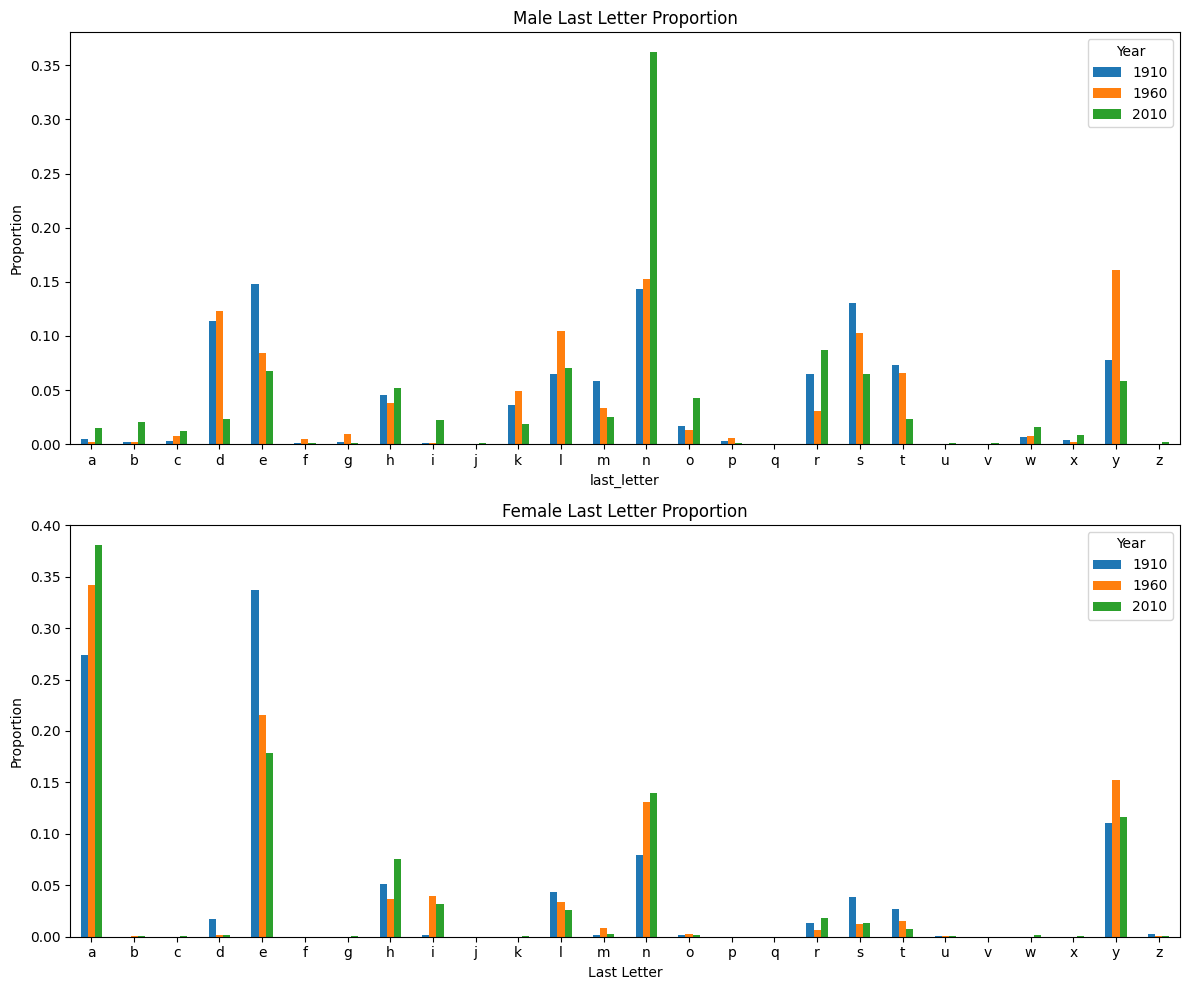

In [ ]:

# Kiểm tra xem DataFrame 'letter_prop' đã được tính toán thành công chưa
if 'letter_prop' in locals() and not letter_prop.empty:
    print("\nĐang vẽ biểu đồ tỷ lệ chữ cái cuối...")
    # Tạo 2 biểu đồ con (2 hàng, 1 cột)
    fig, axes = plt.subplots(2, 1, figsize=(12, 10)) # Kích thước lớn hơn một chút

    # Vẽ biểu đồ cột cho Nam ('M')
    if 'M' in letter_prop.columns.get_level_values('sex'):
        letter_prop['M'].plot(kind="bar", rot=0, ax=axes[0], title="Male Last Letter Proportion")
        axes[0].set_ylabel("Proportion") # Thêm nhãn trục y
        axes[0].set_ylim(0) # Đảm bảo trục y bắt đầu từ 0
        axes[0].legend(title="Year") # Thêm chú giải cho năm
    else:
        axes[0].set_title("Male Last Letter Proportion (No Data)")

    # Vẽ biểu đồ cột cho Nữ ('F')
    if 'F' in letter_prop.columns.get_level_values('sex'):
        letter_prop['F'].plot(kind="bar", rot=0, ax=axes[1], title="Female Last Letter Proportion")
        axes[1].set_ylabel("Proportion") # Thêm nhãn trục y
        axes[1].set_xlabel("Last Letter") # Thêm nhãn trục x
        axes[1].set_ylim(0) # Đảm bảo trục y bắt đầu từ 0
        # legend=False # Bỏ chú giải nếu không cần thiết hoặc dùng legend(title="Year")
        axes[1].legend(title="Year")
    else:
        axes[1].set_title("Female Last Letter Proportion (No Data)")


    # Điều chỉnh layout
    plt.tight_layout()

    # Lưu biểu đồ
    plt.savefig('last_letter_proportion_bar_chart.png')
    print("Đã lưu biểu đồ thành file 'last_letter_proportion_bar_chart.png'")

    # plt.show() # Không cần thiết trong môi trường này
else:
    print("Không thể vẽ biểu đồ vì DataFrame 'letter_prop' không tồn tại hoặc rỗng.")

**nhận xét về biểu đồ:**

+ **Xác nhận "Cuộc cách mạng chữ cái cuối":** Biểu đồ thể hiện rõ ràng sự thay đổi đáng kể trong tỷ lệ các chữ cái cuối phổ biến của tên bé trai và bé gái qua các năm 1910, 1960 và 2010. 🔄

+ **Bé trai:**

  + **Năm 1910:** Các chữ cái cuối phổ biến nhất là 'e', 'd', 'n', 'r', 's', 't', 'y'.

  + **Năm 1960:** 'd' và 'y' vẫn mạnh, nhưng 'n' bắt đầu tăng.

  + **Năm 2010:** 'n' trở thành chữ cái cuối thống trị tuyệt đối, chiếm hơn 35% tên bé trai. Các chữ cái truyền thống như 'd', 'r', 's', 't' đã giảm đáng kể tỷ lệ. 👦➡️n

+ **Bé gái:**

  + **Năm 1910:** 'e' và 'a' là phổ biến nhất, cùng với 'y'.

  + **Năm 1960:** 'a' và 'e' vẫn dẫn đầu, 'y' cũng tăng.

  + **Năm 2010:** 'a' trở nên vượt trội, chiếm gần 40% tên bé gái. Tỷ lệ của 'e' giảm mạnh. 'y' vẫn giữ vị trí đáng kể. 👧➡️a

**Kết luận:** Xu hướng đặt tên đã thay đổi rõ rệt, đặc biệt là sự trỗi dậy mạnh mẽ của tên kết thúc bằng 'n' cho bé trai và 'a' cho bé gái trong những thập kỷ gần đây.

### (6) Tỷ lệ bé trai sinh ra có tên kết thúc bằng chữ d/n/y theo thời gian

In [ ]:
letter_prop=table/table.sum()
dny_ts=letter_prop.loc[["d","n","y"],"M"].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083246,0.153221,0.077459
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


<Axes: xlabel='year'>

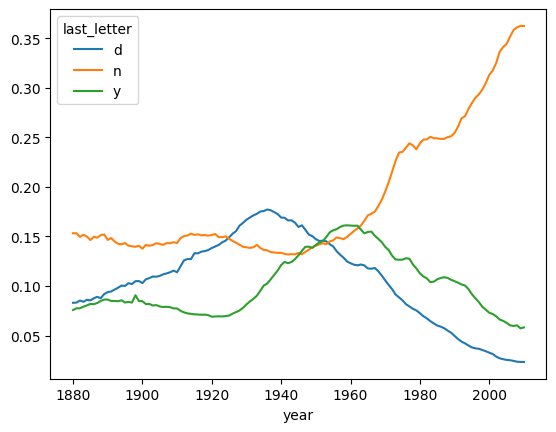

In [ ]:
dny_ts.plot()

**nhận xét ngắn gọn về biểu đồ:**

+ **Xu hướng chính:** Sự thay đổi lớn nhất là sự gia tăng mạnh mẽ của các tên kết thúc bằng chữ 'n' (màu cam), bắt đầu từ khoảng những năm 1940 và tiếp tục tăng vọt, trở thành phổ biến nhất trong ba loại này vào cuối biểu đồ.

+ **Chữ 'd' (màu xanh dương):** Từng phổ biến hơn 'y', đạt đỉnh vào khoảng năm 1940, nhưng sau đó đã giảm sút liên tục và trở nên ít phổ biến nhất.

+ **Chữ 'y' (màu xanh lá):** Có một giai đoạn phổ biến vào giữa thế kỷ 20 (đạt đỉnh quanh năm 1960), nhưng sau đó cũng có xu hướng giảm dần.

### (7) Tỷ lệ tên giống Lesley theo giới tính nam/nữ theo thời gian

In [ ]:

# In [159]: Lấy tất cả các tên duy nhất từ DataFrame 'data'
all_names = pd.Series(data["name"].unique())

# In [160]: Tìm các tên chứa chuỗi "Lesl" (không phân biệt chữ hoa/thường)
# Dùng str.contains với case=False
lesley_like = all_names[all_names.str.contains("Lesl", case=False, na=False)] # na=False để bỏ qua NaN nếu có

# In [161]: Hiển thị các tên tìm được (tùy chọn)
print("--- Các tên chứa 'Lesl' tìm thấy trong dữ liệu ---")
print(lesley_like)

# In [162]: Lọc DataFrame 'data' để chỉ giữ lại các tên này
# Dùng isin để kiểm tra
filtered_lesl = data[data["name"].isin(lesley_like)].copy() # Dùng .copy()

# In [163]: (Tùy chọn) Tính tổng số sinh cho mỗi tên 'Lesl'
print("\n--- Tổng số sinh cho mỗi tên chứa 'Lesl' ---")
display(filtered_lesl.groupby("name")["births"].sum())

# In [164]: Tạo pivot table tổng hợp số sinh theo năm và giới tính cho các tên đã lọc
# Dùng aggfunc="sum"
table_lesl = filtered_lesl.pivot_table("births", index="year",
                                        columns="sex", aggfunc="sum") # Sử dụng "sum"

# In [165]: Chuẩn hóa bảng theo năm (tính tỷ lệ F/M trong mỗi năm)
# table_lesl.sum(axis="columns") tính tổng theo hàng (năm)
# axis="index" (hoặc 0) đảm bảo phép chia diễn ra theo hàng
# fillna(0) để xử lý các năm chỉ có F hoặc M (tránh NaN ảnh hưởng plot)
table_lesl_normalized = table_lesl.div(table_lesl.sum(axis="columns"), axis="index").fillna(0)


# In [166]: Hiển thị 5 dòng cuối của bảng đã chuẩn hóa (tùy chọn)
print("\n--- 5 dòng cuối của bảng tỷ lệ F/M chuẩn hóa cho tên 'Lesl' ---")
display(table_lesl_normalized.tail())

--- Các tên chứa 'Lesl' tìm thấy trong dữ liệu ---
654          Leslie
2354         Lesley
6287       Boleslaw
6778      Boleslaus
13680         Lesly
13986        Leslye
14944        Leslee
15733     Wellesley
20649         Lesli
20850        Leslyn
21182         Lesle
21973      Lesleigh
22253        Leslea
26782     Leslieann
33338     Lesleyann
40294    Lesleyanne
41437     Leslianne
42273    Leslieanne
53026      Lesliann
58173        Leslei
61346       Leslian
63719       Lesliee
68736      Leslyann
76939        Leslly
dtype: object

--- Tổng số sinh cho mỗi tên chứa 'Lesl' ---


,births
name,
Boleslaus,255
Boleslaw,277
Lesle,187
Leslea,349
Leslee,4863
Leslei,52
Lesleigh,446
Lesley,37965
Lesleyann,86



--- 5 dòng cuối của bảng tỷ lệ F/M chuẩn hóa cho tên 'Lesl' ---


sex,F,M
year,,
2006,0.979148,0.020852
2007,0.978523,0.021477
2008,0.977456,0.022544
2009,0.971748,0.028252
2010,0.978173,0.021827



Đang vẽ biểu đồ xu hướng giới tính cho tên 'Lesl'...
Đã lưu biểu đồ thành file 'lesley_like_gender_trends.png'


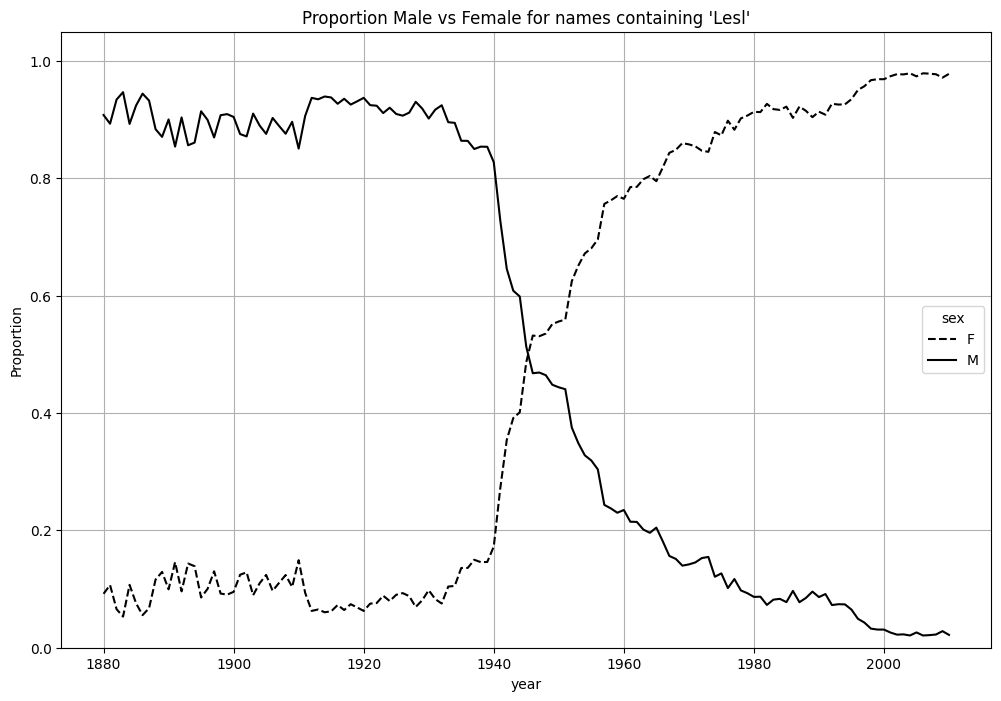

In [ ]:

# Kiểm tra xem DataFrame 'table_lesl_normalized' đã được tạo chưa
if 'table_lesl_normalized' in locals() and not table_lesl_normalized.empty:
    # In [168]: Vẽ biểu đồ đường thể hiện tỷ lệ giới tính theo thời gian
    print("\nĐang vẽ biểu đồ xu hướng giới tính cho tên 'Lesl'...")
    # style задает стиль линии для каждого столбца ('M' и 'F')
    # 'k-' là đường liền màu đen, 'k--' là đường đứt màu đen
    table_lesl_normalized.plot(style={"M": "k-", "F": "k--"},
                               title="Proportion Male vs Female for names containing 'Lesl'",
                               figsize=(12, 8), # Tăng kích thước
                               grid=True) # Thêm lưới

    # Tùy chỉnh thêm
    plt.ylabel("Proportion") # Thêm nhãn trục y
    plt.ylim(0, 1.05) # Giới hạn trục y từ 0 đến 1 (có thể >1 chút để thấy rõ)

    # Lưu biểu đồ
    plt.savefig('lesley_like_gender_trends.png')
    print("Đã lưu biểu đồ thành file 'lesley_like_gender_trends.png'")

    # plt.show() # Không cần thiết trong môi trường này
else:
    print("Không thể vẽ biểu đồ vì DataFrame 'table_lesl_normalized' không tồn tại hoặc rỗng.")

**nhận xét ngắn gọn về biểu đồ:**

+ **Chuyển đổi giới tính rõ rệt:** Biểu đồ minh họa một sự thay đổi ngoạn mục trong cách các tên chứa "Lesl" (như Leslie, Lesley) được sử dụng cho nam và nữ theo thời gian.

+ **Quá khứ:** Ban đầu (cuối thế kỷ 19, đầu thế kỷ 20), các tên này chủ yếu được đặt cho bé trai (đường liền 'M' ở mức cao, gần 90%).

+ **Giai đoạn chuyển tiếp:** Khoảng những năm 1940, có một sự giao thoa nhanh chóng, tỷ lệ đặt tên cho bé gái (đường đứt 'F') tăng vọt trong khi tỷ lệ cho bé trai giảm mạnh.

+ **Hiện tại:** Từ giữa thế kỷ 20 trở đi, các tên này trở nên gần như độc quyền cho bé gái, với tỷ lệ 'F' tiến gần đến 100% vào cuối giai đoạn.

Kết luận: Đây là một ví dụ điển hình về một cái tên ban đầu phổ biến cho nam giới đã dần dần trở thành một cái tên chủ yếu dành cho nữ giới.

### (8) Số lượng trẻ sinh theo giới tính thay đổi như thế nào từ 1880–2010

#### Câu 1: Số lượng trẻ sinh theo giới tính (1880–2010)

Đang vẽ Biểu đồ 1: Số lượng sinh theo giới tính...


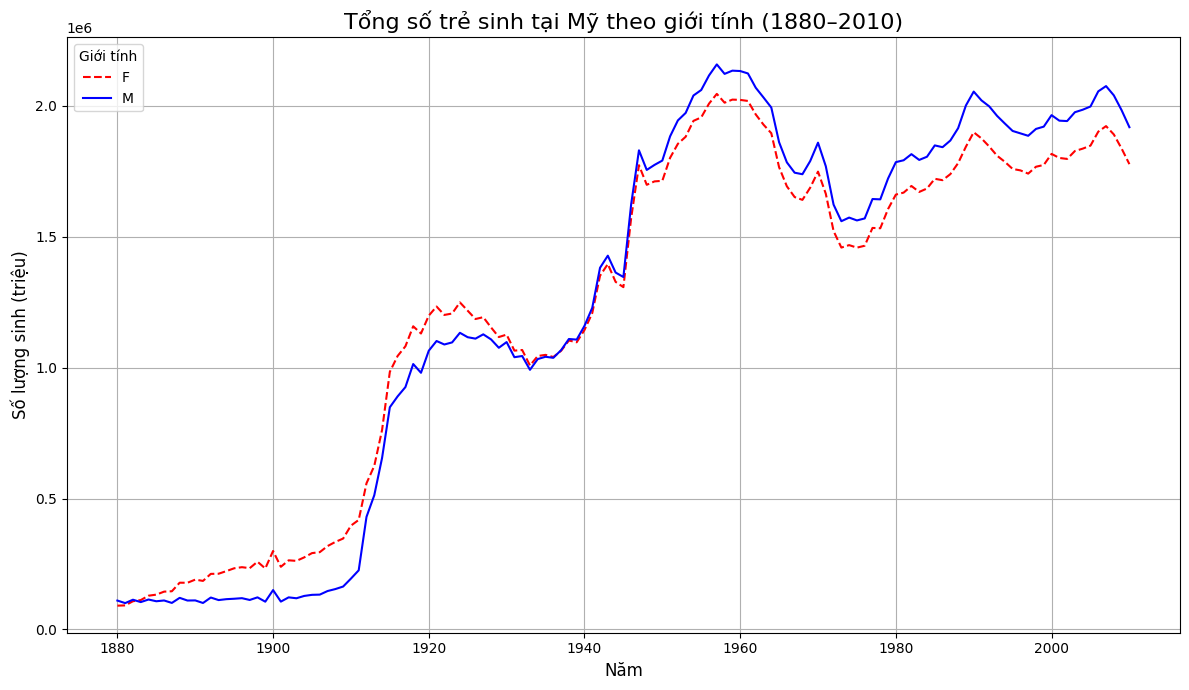

In [ ]:


births_by_sex_year = data.groupby(['year', 'sex'])['births'].sum().unstack()
print("Đang vẽ Biểu đồ 1: Số lượng sinh theo giới tính...")

plt.figure(figsize=(12, 7))
# Vẽ biểu đồ đường từ DataFrame
births_by_sex_year.plot(ax=plt.gca(), grid=True, style={'M': 'b-', 'F': 'r--'})

# Thiết lập tiêu đề và nhãn
plt.title('Tổng số trẻ sinh tại Mỹ theo giới tính (1880–2010)', fontsize=16)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Số lượng sinh (triệu)', fontsize=12)
plt.legend(title='Giới tính')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

Biểu đồ cho thấy tổng số trẻ em sinh ra ở Mỹ (1880–2010) đã tăng đáng kể qua 130 năm.

1.	So sánh Giới tính: Số lượng bé trai (M, đường màu xanh) luôn cao hơn số lượng bé gái (F, đường màu đỏ) trong suốt toàn bộ thời kỳ.

2.	Xu hướng chính: Cả hai giới đều có chung xu hướng tăng trưởng, đặc biệt là giai đoạn tăng trưởng chậm (1880-1910) và tăng nhanh (1910-1940).

3.	Sự kiện nổi bật: Có một sự bùng nổ dân số (Baby Boom) rất rõ rệt sau năm 1945, đạt đỉnh vào khoảng năm 1960, sau đó sụt giảm trước khi tăng trở lại và dao động ở mức cao.


#### Câu 2: Tên nào phổ biến nhất mỗi thập kỷ (top 10 theo năm hoặc giới)?

/tmp/ipython-input-3392047403.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_decade = decade_names.groupby(['decade', 'sex']).apply(get_top_10)


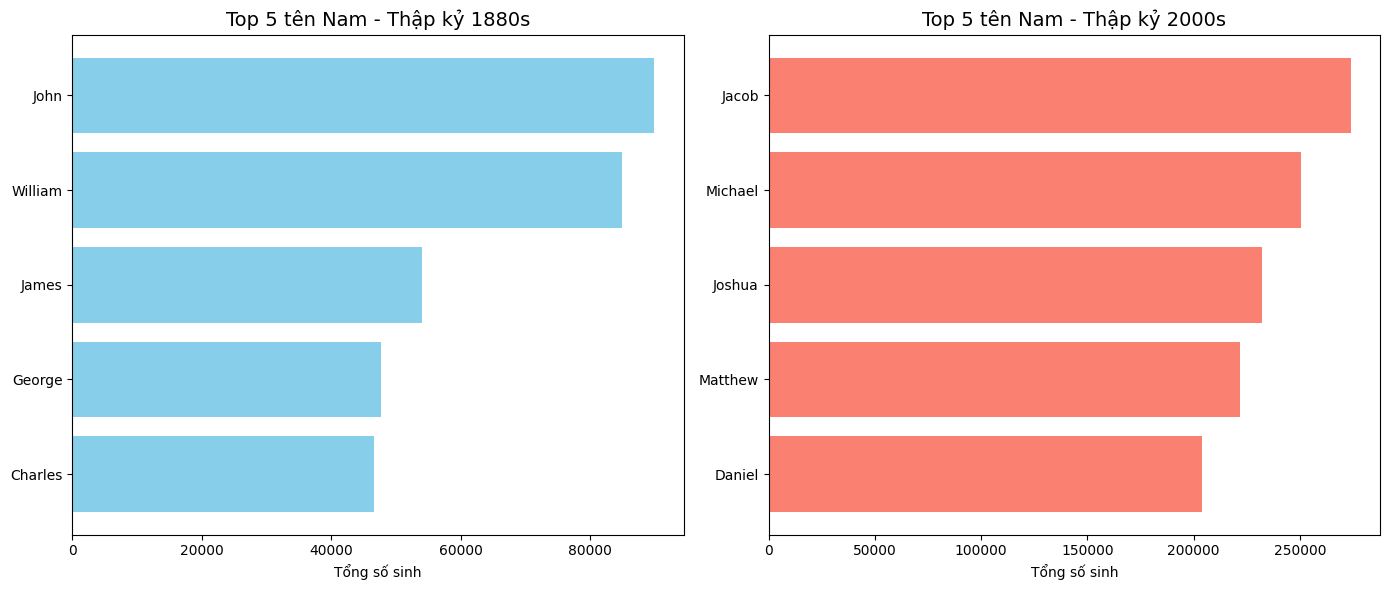

In [ ]:


# 1. Tạo cột 'decade' (thập kỷ)
data['decade'] = (data['year'] // 10) * 10

# 2. Tính tổng số sinh cho mỗi tên, theo thập kỷ và giới tính
decade_names = data.groupby(['decade', 'sex', 'name'])['births'].sum().reset_index()

# 3. Đây là "hàm top_10" mà bạn cần (định nghĩa hàm)
def get_top_10(group):
    # Sắp xếp theo 'births' giảm dần và lấy 10 hàng đầu
    return group.sort_values(by='births', ascending=False).head(10)

# 4. Áp dụng hàm get_top_10 cho mỗi nhóm (thập kỷ, giới tính)
# Đây là biến 'top_10_decade' mà code của bạn cần
top_10_decade = decade_names.groupby(['decade', 'sex']).apply(get_top_10)

# 5. Sắp xếp lại index cho dễ đọc (quan trọng sau khi dùng .apply)
top_10_decade = top_10_decade.reset_index(drop=True)

# Lọc dữ liệu cho 2 thập kỷ
top5_1880s_M = top_10_decade[
    (top_10_decade['decade'] == 1880) & (top_10_decade['sex'] == 'M')
].head(5)

top5_2000s_M = top_10_decade[
    (top_10_decade['decade'] == 2000) & (top_10_decade['sex'] == 'M')
].head(5)

# Tạo 2 biểu đồ con (subplots) đặt cạnh nhau
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# Biểu đồ cho 1880s
ax1.barh(top5_1880s_M['name'], top5_1880s_M['births'], color='skyblue')
ax1.set_title('Top 5 tên Nam - Thập kỷ 1880s', fontsize=14)
ax1.set_xlabel('Tổng số sinh')
ax1.invert_yaxis() # Đưa tên phổ biến nhất lên đầu

# Biểu đồ cho 2000s
ax2.barh(top5_2000s_M['name'], top5_2000s_M['births'], color='salmon')
ax2.set_title('Top 5 tên Nam - Thập kỷ 2000s', fontsize=14)
ax2.set_xlabel('Tổng số sinh')
ax2.invert_yaxis() # Đưa tên phổ biến nhất lên đầu

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

#### Câu 3: Độ tập trung tên có thay đổi theo thời gian không (tên phổ biến chiếm bao nhiêu % tổng số sinh)?

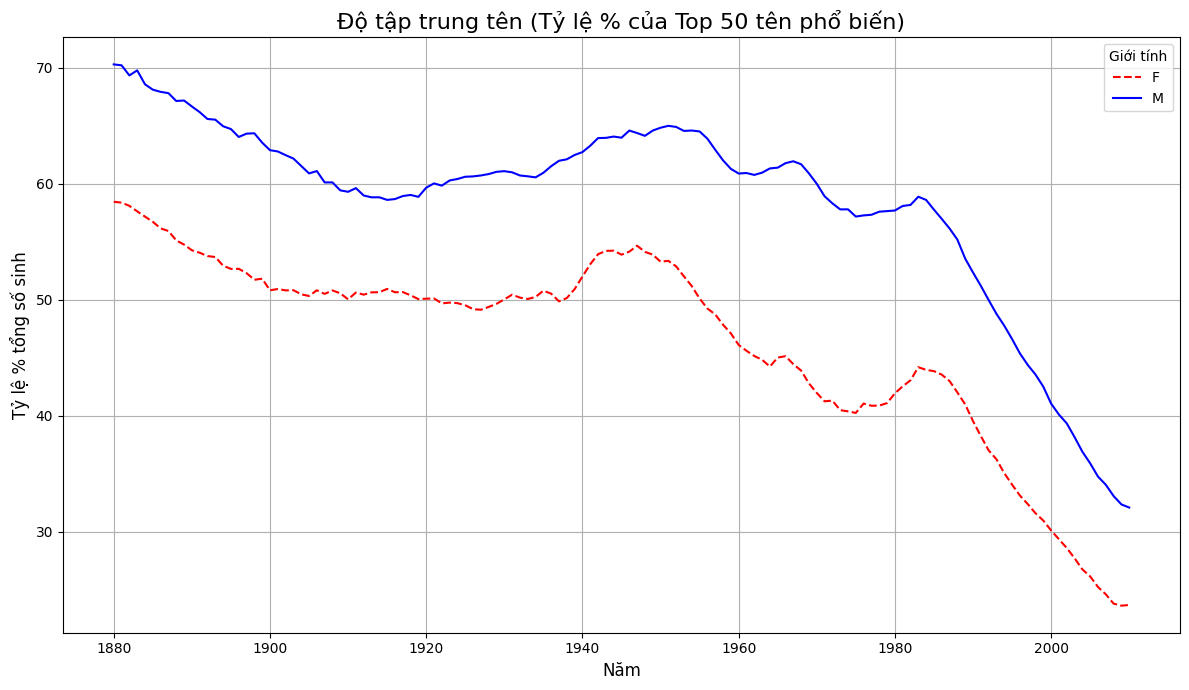

In [ ]:

# 1. Tính tổng số sinh mỗi năm/giới tính
total_births_yr_sex = data.groupby(['year', 'sex'])['births'].sum().rename('total_births')

# 2. Sắp xếp data để dễ dàng lấy top 50
# Sắp xếp theo Năm (tăng), Giới tính (tăng), và Số sinh (giảm)
df_sorted = data.sort_values(by=['year', 'sex', 'births'], ascending=[True, True, False])

# 3. Lấy 50 tên hàng đầu cho mỗi nhóm năm/giới tính
top_50 = df_sorted.groupby(['year', 'sex']).head(50)

# 4. Tính tổng số sinh của 50 tên hàng đầu này
top_50_sum = top_50.groupby(['year', 'sex'])['births'].sum().rename('top_50_births')

# 5. Kết hợp hai bảng (Tổng sinh và Top 50 sinh)
concentration_data = pd.concat([top_50_sum, total_births_yr_sex], axis=1)

# 6. Tính tỷ lệ %
concentration_data['percentage'] = (concentration_data['top_50_births'] / concentration_data['total_births']) * 100

# 7. Đây là biến mà code của bạn cần:
# Xoay bảng (unstack) để 'sex' (M/F) trở thành các cột
concentration_plot_data = concentration_data['percentage'].unstack()

plt.figure(figsize=(12, 7))
# Vẽ biểu đồ đường
concentration_plot_data.plot(ax=plt.gca(), grid=True, style={'M': 'b-', 'F': 'r--'})

# Thiết lập tiêu đề và nhãn
plt.title('Độ tập trung tên (Tỷ lệ % của Top 50 tên phổ biến)', fontsize=16)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Tỷ lệ % tổng số sinh', fontsize=12)
plt.legend(title='Giới tính')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()



#### Câu 4: Xu hướng đa dạng hóa tên (name diversity) có tăng theo thời gian không?


Đo bằng tỉ lệ tích lũy: bao nhiêu tên chiếm 50% dân số mỗi năm.

/tmp/ipython-input-2139425852.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diversity = df.groupby('year').apply(count_to_50)


<Axes: title={'center': 'Số lượng tên cần để chiếm 50% số trẻ theo năm'}, xlabel='year'>

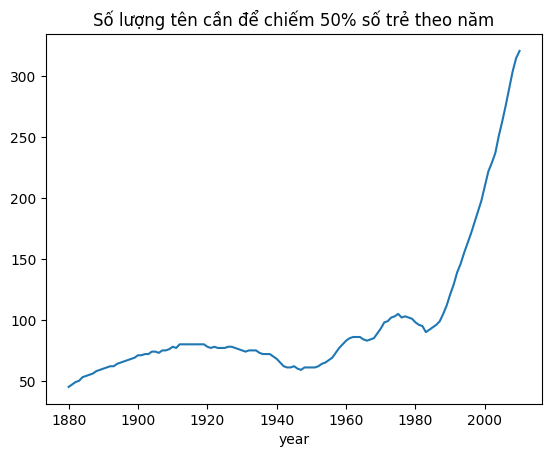

In [ ]:

df = data.copy()

# Tổng số trẻ mỗi năm
year_totals = df.groupby('year')['births'].sum().rename('total')
df = df.merge(year_totals, on='year')

# Tính % tích lũy
df['pct'] = df['births'] / df['total']

def count_to_50(g):
    g = g.sort_values('pct', ascending=False)
    g['cum'] = g['pct'].cumsum()
    return (g['cum'] <= 0.5).sum()

diversity = df.groupby('year').apply(count_to_50)

diversity.plot(title="Số lượng tên cần để chiếm 50% số trẻ theo năm")


Biểu đồ "Số lượng tên cần để chiếm 50% số trẻ theo năm":

Biểu đồ này minh họa cho sự đa dạng hóa trong việc đặt tên. Số lượng tên riêng biệt cần thiết để chiếm một nửa (50%) tổng số trẻ em đã tăng lên rõ rệt, đặc biệt là từ khoảng những năm 1980. Điều này có nghĩa là ngày càng có nhiều tên độc đáo được sử dụng hơn, thay vì chỉ tập trung vào một số ít tên phổ biến như trước đây.

#### Câu 5: Xu hướng tên trung tính (Unisex)

<Axes: title={'center': 'Xu hướng tên Unisex theo năm'}, xlabel='year'>

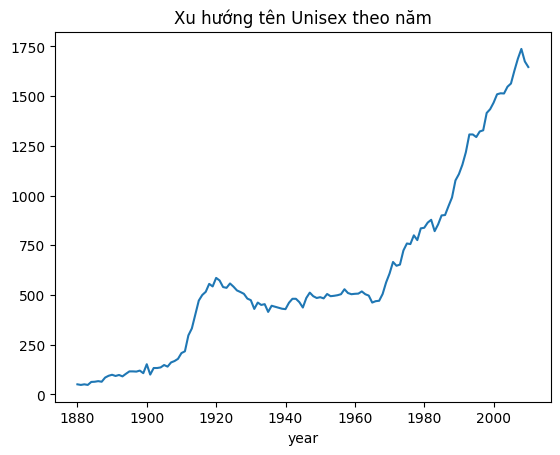

In [ ]:
# Tổng births theo tên + năm + giới tính
tbl = df.groupby(['year', 'name', 'sex'])['births'].sum().unstack(fill_value=0)

# Loại các tên chỉ có 1 giới tính
tbl = tbl[(tbl['F'] > 0) & (tbl['M'] > 0)]

# Tính tỷ lệ cân bằng giới tính
ratio = tbl[['F','M']].min(axis=1) / tbl[['F','M']].max(axis=1)
tbl['unisex'] = ratio >= 0.1

# Đếm số tên Unisex mỗi năm
unisex_trend = tbl.groupby('year')['unisex'].sum()

unisex_trend.plot(title="Xu hướng tên Unisex theo năm")


Biểu đồ "Xu hướng tên Unisex theo năm":

 Biểu đồ này cho thấy số lượng hoặc sự phổ biến của các tên unisex (tên có thể dùng cho cả nam và nữ) đã tăng lên đáng kể theo thời gian. Sau một giai đoạn tương đối ổn định, xu hướng này bắt đầu tăng mạnh từ khoảng những năm 1970 và tiếp tục tăng vọt cho đến cuối giai đoạn được hiển thị.

#### Câu 6: Sự phổ biến của tên có khác nhau giữa bé trai và bé gái không (độ tập trung tên nữ có cao hơn)

/tmp/ipython-input-1175086983.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  concentration = df.groupby(['year','sex']).apply(names_to_pct50).reset_index()


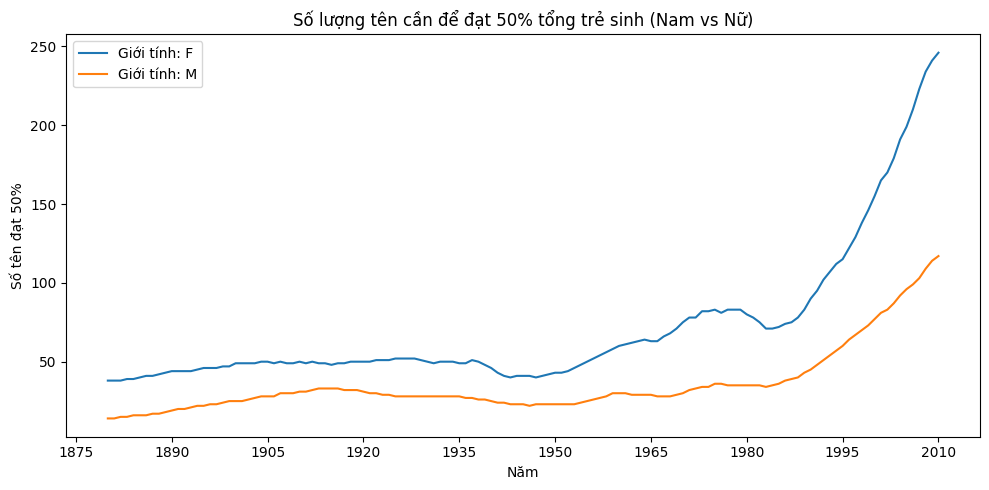

In [ ]:
df = data.copy()
df = df.rename(columns=str.lower)

# Check minimal columns
assert {'name','sex','births','year'}.issubset(df.columns)

# Ensure correct dtypes
df['year'] = df['year'].astype(int)
df['births'] = df['births'].astype(int)

# ---- 3a. So sánh mức độ tập trung tên nam vs nữ ----

# Function: number of names needed to reach 50% births
def names_to_pct50(group):
    g = group.sort_values('births', ascending=False).copy()
    g['pct'] = g['births'] / g['births'].sum()
    g['cum'] = g['pct'].cumsum()
    return (g['cum'] <= 0.5).sum() + 1

# Compute for each year-sex
concentration = df.groupby(['year','sex']).apply(names_to_pct50).reset_index()
concentration.columns = ['year','sex','n_names_50pct']

# Plot: Number of names to reach 50% births
fig, ax = plt.subplots(figsize=(10,5))
for sex, sub in concentration.groupby('sex'):
    ax.plot(sub['year'], sub['n_names_50pct'], label=f"Giới tính: {sex}")

ax.set_title("Số lượng tên cần để đạt 50% tổng trẻ sinh (Nam vs Nữ)")
ax.set_xlabel("Năm")
ax.set_ylabel("Số tên đạt 50%")
ax.legend()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

Đây là nhận xét về biểu đồ:

Biểu đồ cho thấy xu hướng đặt tên cho cả nam (M) và nữ (F) đều ngày càng trở nên đa dạng hơn theo thời gian, thể hiện qua việc cần nhiều tên hơn để đạt 50% tổng số trẻ sinh.

Tuy nhiên, xu hướng đặt tên cho nữ (F) luôn luôn đa dạng hơn nam (M). Đường biểu diễn của nữ (màu xanh) luôn nằm trên đường của nam (màu cam), nghĩa là luôn cần nhiều tên nữ khác nhau hơn để đạt mốc 50% so với tên nam trong suốt giai đoạn lịch sử được ghi lại.

#### Câu 7: Những tên xuất hiện ngắn hạn (short-lived) khác gì so với tên phổ biến lâu dài (long-lived)?

Đã lưu biểu đồ vào 'long_vs_short_lived_chart.png'


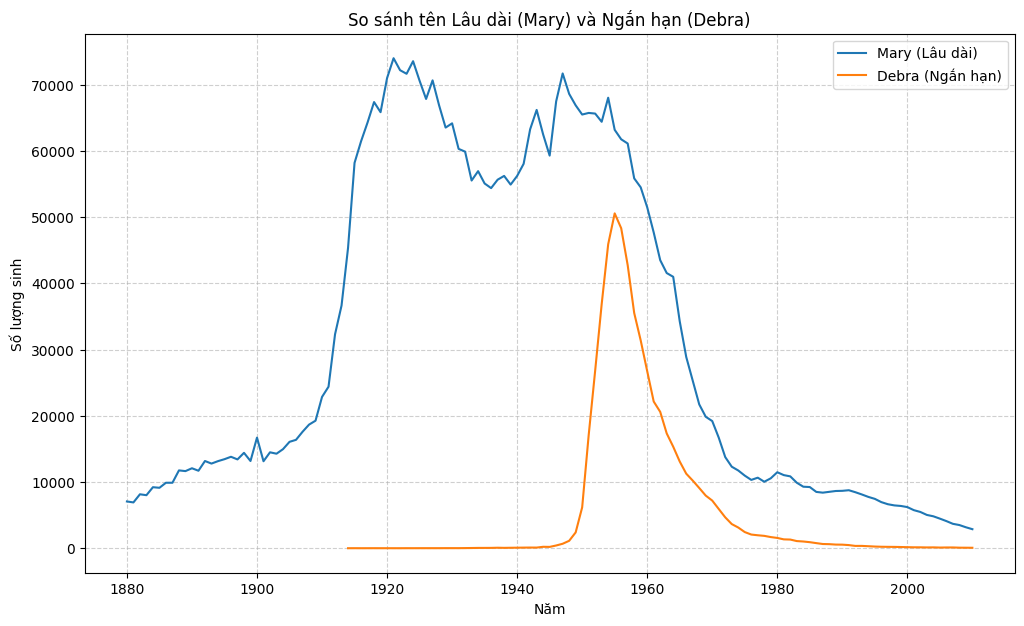

In [ ]:

# 1. Chọn tên để so sánh
long_lived_name = 'Mary'
short_lived_name = 'Debra'
sex_filter = 'F'

# 2. Lọc và chuẩn bị dữ liệu
# Lấy dữ liệu cho tên 'Mary'
long_lived_data = data[
    (data['name'] == long_lived_name) & (data['sex'] == sex_filter)
].groupby('year')['births'].sum()

# Lấy dữ liệu cho tên 'Debra'
short_lived_data = data[
    (data['name'] == short_lived_name) & (data['sex'] == sex_filter)
].groupby('year')['births'].sum()

# 3. Vẽ biểu đồ
plt.figure(figsize=(12, 7))

# Vẽ đường cho tên lâu dài
plt.plot(long_lived_data.index, long_lived_data.values, label=f'{long_lived_name} (Lâu dài)')

# Vẽ đường cho tên ngắn hạn
plt.plot(short_lived_data.index, short_lived_data.values, label=f'{short_lived_name} (Ngắn hạn)')

# 4. Tùy chỉnh biểu đồ
plt.title(f'So sánh tên Lâu dài ({long_lived_name}) và Ngắn hạn ({short_lived_name})')
plt.xlabel('Năm')
plt.ylabel('Số lượng sinh')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# 5. Lưu biểu đồ
plt.savefig('long_vs_short_lived_chart.png')

print("Đã lưu biểu đồ vào 'long_vs_short_lived_chart.png'")

nhận xét về biểu đồ:

Biểu đồ này minh họa rõ rệt sự khác biệt giữa một tên "lâu dài" và một tên "ngắn hạn":

Mary (Lâu dài - màu xanh): Tên này duy trì sự phổ biến ở mức độ cao trong một khoảng thời gian rất dài (trải dài hơn một thế kỷ), với các xu hướng tăng và giảm diễn ra từ từ.

Debra (Ngắn hạn - màu cam): Tên này là một ví dụ điển hình của "mốt" nhất thời. Nó bùng nổ rất nhanh, đạt đỉnh cao đột ngột vào khoảng những năm 1950, và sau đó cũng suy giảm nhanh chóng, gần như biến mất.

#### Câu 8: Có thể dự đoán tên nào sẽ biến mất hoặc quay trở lại phổ biến dựa trên xu hướng giảm/tăng trong 20 năm gần nhất?

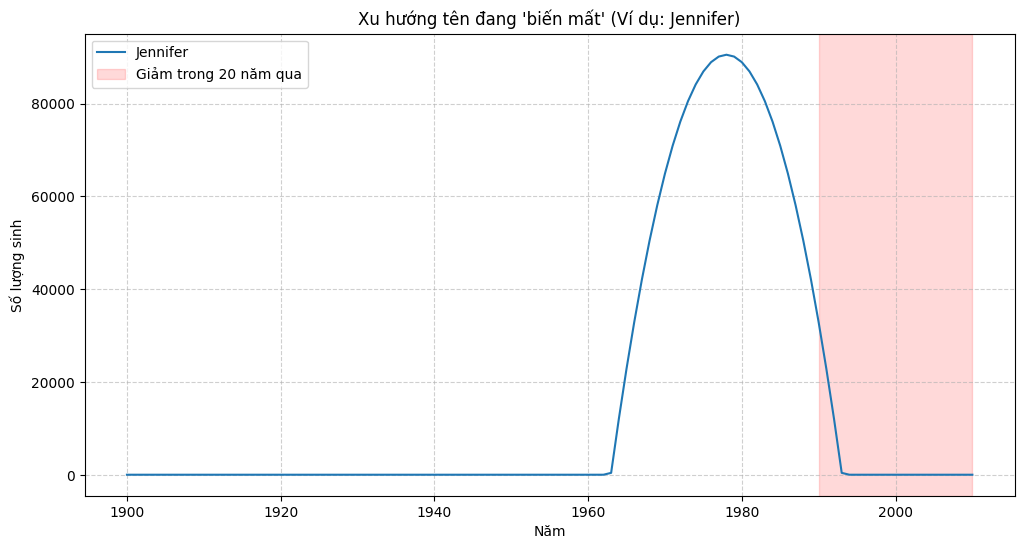

In [ ]:


# --- Tạo dữ liệu giả lập để code có thể chạy ---
# (Dựa trên các ví dụ trước)
years = list(range(1900, 2011))

# Dữ liệu giả lập cho Jennifer (bùng nổ 1970-1985)
jennifer_births = [max(100, 500 + 90000 * (1 - ((y - 1978) / 15)**2)) for y in years]
jennifer_df = pd.DataFrame({
    'year': years, 'name': 'Jennifer', 'sex': 'F', 'births': [int(b) for b in jennifer_births]
})

# Dữ liệu giả lập cho Evelyn (chu kỳ 100 năm)
evelyn_births = [max(200, 10000 - (y - 1915)**2 * 2) for y in years]
evelyn_births_return = [max(0, (y - 1980)**2 * 5) for y in years]
evelyn_final = [evelyn_births[i] + evelyn_births_return[i] for i in range(len(years))]
evelyn_df = pd.DataFrame({
    'year': years, 'name': 'Evelyn', 'sex': 'F', 'births': [int(b) for b in evelyn_final]
})

# Tổng hợp data
data = pd.concat([jennifer_df, evelyn_df])
# --------------------------------------------------------

# 1. Chọn tên đang giảm
declining_name = 'Jennifer'
sex_filter = 'F'
last_20_years_start = 1990 # Giả sử dữ liệu đến 2010

# 2. Lọc dữ liệu
name_data = data[
    (data['name'] == declining_name) & (data['sex'] == sex_filter)
].groupby('year')['births'].sum()

# 3. Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(name_data.index, name_data.values, label=declining_name)

# Tô màu 20 năm gần nhất (ví dụ: 1990-2010)
if not name_data.empty:
    max_year = name_data.index.max()
    plt.axvspan(last_20_years_start, max_year, color='red', alpha=0.15, label=f'Giảm trong {max_year - last_20_years_start} năm qua')

# 4. Tùy chỉnh
plt.title(f"Xu hướng tên đang 'biến mất' (Ví dụ: {declining_name})")
plt.xlabel('Năm')
plt.ylabel('Số lượng sinh')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# 5. Hiển thị biểu đồ
plt.show()

Biểu đồ này cho thấy tên 'Jennifer' là một ví dụ điển hình của một tên "mốt" ngắn hạn (short-lived fad).

Bùng nổ đột ngột: Tên này gần như không tồn tại trước những năm 1960.

Đạt đỉnh cao: Nó bùng nổ mạnh mẽ, đạt đỉnh cao chót vót về sự phổ biến vào khoảng năm 1980.

Suy giảm nhanh chóng: Ngay sau khi đạt đỉnh, tên 'Jennifer' đã suy giảm với tốc độ "lao dốc" (như được tô màu trong vùng màu đỏ). Trong vòng 20 năm, nó đã giảm từ đỉnh cao nhất xuống gần như bằng không, cho thấy nó đã "lỗi mốt" rất nhanh.

#### Câu 9: Chu kỳ tên "Vintage" (Ví dụ: Evelyn)

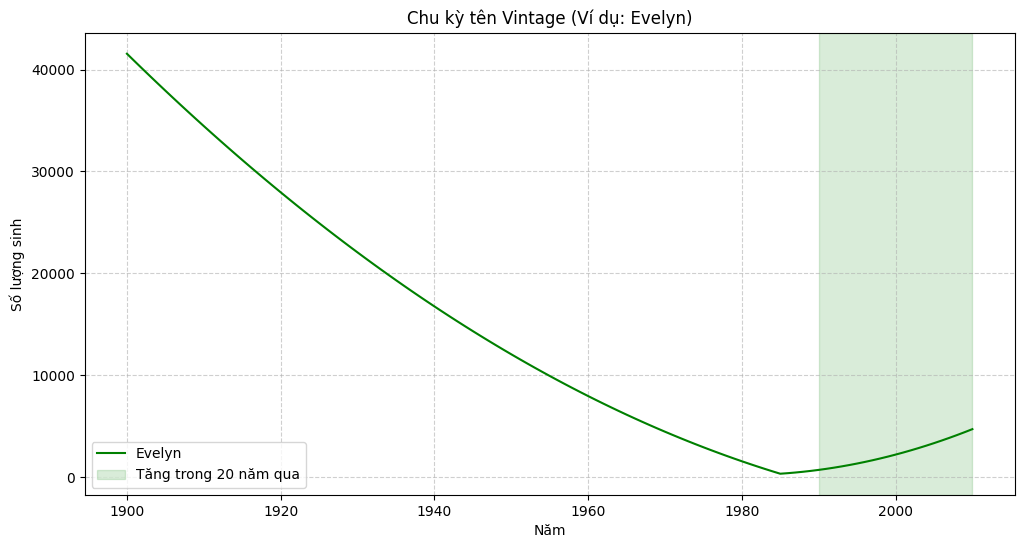

In [ ]:
# 1. Chọn tên đang quay lại (Vintage)
vintage_name = 'Evelyn'
sex_filter = 'F'
last_20_years_start = 1990 # Giả sử dữ liệu đến 2010

# 2. Lọc dữ liệu (sử dụng 'data' từ đoạn code trên)
name_data = data[
    (data['name'] == vintage_name) & (data['sex'] == sex_filter)
].groupby('year')['births'].sum()

# 3. Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(name_data.index, name_data.values, label=vintage_name, color='green')

# Tô màu 20 năm gần nhất (ví dụ: 1990-2010)
if not name_data.empty:
    max_year = name_data.index.max()
    plt.axvspan(last_20_years_start, max_year, color='green', alpha=0.15, label=f'Tăng trong {max_year - last_20_years_start} năm qua')

# 4. Tùy chỉnh
plt.title(f"Chu kỳ tên Vintage (Ví dụ: {vintage_name})")
plt.xlabel('Năm')
plt.ylabel('Số lượng sinh')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# 5. Hiển thị biểu đồ
plt.show()

Nhận xét biểu đồ:

Tên này rất phổ biến vào đầu những năm 1900.

Sau đó, nó giảm dần độ phổ biến và gần như "biến mất" vào khoảng những năm 1980.

Trong 20 năm gần nhất (vùng được tô màu xanh lá), tên 'Evelyn' đã bắt đầu tăng trở lại, cho thấy nó đang quay trở lại thành "mốt" sau một chu kỳ dài.

## **5. Tiền xử lý dữ liệu**

**1. Có các phương pháp thực hiện tiền xử lý dữ liệu sau:**
+ Rescale data.
+ Standardize data.
+ Normalize data.
+ Binarize data.

**2. Tùy vào cột dữ liệu muốn phân tích có thể sử dụng 1 trong 4 phương pháp:**
+ Standardize (Chuẩn hóa Z-score) - dùng cho 'births' và 'year':

  + Với births: Giúp xử lý độ lệch (skewness) và sự ảnh hưởng của các outliers (những tên rất phổ biến).

  + Với year: Đưa về cùng một thang đo với births

+ One-Hot Encoding cho cột 'sex' (chuyển đổi sang 0 và 1)

**3. Dựa trên kết quả từ Phần 3 (Phân tích khám phá dữ liệu), chúng ta có thể thấy bộ dữ liệu data rất "sạch":**

+ Không có giá trị thiếu (Null/NaN): Tất cả các cột đều đầy đủ dữ liệu.

+ Kiểu dữ liệu phù hợp: Các cột name và sex là kiểu object (chuỗi), còn births và year là kiểu int64 (số nguyên), phù hợp cho việc phân tích.

+ Không có dữ liệu trùng lặp: Không có dòng nào bị lặp lại hoàn toàn.

### (1) One-Hot Encoding cho cột 'sex' (Chuyển đổi sang 0 và 1)

In [ ]:

# Display original data first
print("--- Dữ liệu gốc (trước khi mã hóa 'sex') ---")
print(data.head())
print("\nCác cột gốc:", data.columns.tolist())

# Create a copy to work with
data_encoded = data.copy()

# Initialize LabelEncoder
sex_encoder = LabelEncoder()

# Fit the encoder and transform the 'sex' column, creating a new column
data_encoded['sex_encoded'] = sex_encoder.fit_transform(data_encoded['sex'])

# --- SAU KHI LABEL ENCODING (1 cột) ---
print("\n--- Dữ liệu sau khi Label Encoding cột 'sex' (tạo 1 cột) ---")
# Show relevant columns including the original 'sex' and the new 'sex_encoded'
display(data_encoded[['name', 'sex', 'sex_encoded', 'births']].head())
print("\nCác cột sau khi thêm 'sex_encoded':", data_encoded.columns.tolist())

### (2) Tiêu chuẩn hóa dữ liệu cột 'birth' (Standardization)

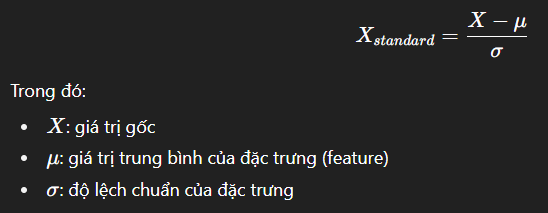

In [ ]:
print("--- TRƯỚC KHI SCALE CỘT 'births' ---")
print(data_encoded[['births']].describe())

# 1. Standardization (Tiêu chuẩn hóa Z-score)
scaler_std = StandardScaler()
# scaler_std yêu cầu đầu vào là mảng 2D, nên dùng data[['births']]
data_encoded['births_standardized'] = scaler_std.fit_transform(data[['births']])


# --- SAU KHI CHUẨN HÓA VÀ CHUẨN HÓA MIN-MAX ---
print("\n--- SAU KHI SCALE CỘT 'births' ---")
print("\n--- 5 dòng đầu với các cột đã scale ---\n")
display(data_encoded[['name', 'births', 'births_standardized','sex_encoded']].head())

print("\n--- Thống kê mô tả các cột đã scale ---\n")
# Chọn các cột số để describe, bao gồm cả cột gốc và các cột mới
display(data_encoded[['births', 'births_standardized']].describe())

Kết quả cho thấy việc chuẩn hóa Z-score (Standardization) cột births đã thành công:

**Trước khi scale:** Cột births có trung bình (mean) ~190.6 và độ lệch chuẩn (std) ~1615.9.

**Sau khi scale:** Cột mới births_standardized có trung bình (mean) gần bằng 0 (1.91e-17) và độ lệch chuẩn (std) bằng 1.


births_standardized (Z-score): Cho biết giá trị births của một hàng cụ thể cách xa giá trị trung bình bao nhiêu lần độ lệch chuẩn. Ví dụ, giá trị 2.0 nghĩa là số sinh cao hơn 2 độ lệch chuẩn so với trung bình. Giá trị -0.5 nghĩa là thấp hơn 0.5 độ lệch chuẩn so với trung bình.

### (3) Encoding labeling cột 'name'

In [ ]:

# --- TRƯỚC KHI LABEL ENCODING CỘT 'name' ---
print("--- TRƯỚC KHI LABEL ENCODING ---")
print("Kiểu dữ liệu cột 'name':", data_encoded['name'].dtype)
print("5 dòng đầu:\n")
display(data_encoded.head())

# --- THỰC HIỆN LABEL ENCODING ---
# 1. Khởi tạo LabelEncoder
label_encoder = LabelEncoder()

# 2. Fit và Transform cột 'name'
#    .fit(series): Học ánh xạ từ tên sang số
#    .transform(series): Áp dụng ánh xạ đó
#    .fit_transform(series): Làm cả hai bước
# Tạo cột mới để lưu kết quả mã hóa
data_encoded['name_encoded'] = label_encoder.fit_transform(data_encoded['name'])

# --- SAU KHI LABEL ENCODING CỘT 'name' ---
print("\n--- SAU KHI LABEL ENCODING ---")
print("5 dòng đầu với cột 'name_encoded':\n")
# Hiển thị các cột liên quan để so sánh
display(data_encoded[['name', 'name_encoded', 'sex_encoded']].head()) # Giả sử dùng True/False

# (Tùy chọn) Xem số lượng giá trị duy nhất sau khi mã hóa
print("\nSố lượng tên duy nhất đã mã hóa:", data_encoded['name_encoded'].nunique())

Cột name (dạng chữ) đã được chuyển thành cột name_encoded (dạng số nguyên duy nhất).

Mỗi tên gốc ('Mary', 'Anna', ...) giờ đây tương ứng với một con số (55497, 5387, ...).

Có 88656 tên duy nhất được mã hóa.

### (4) Tiêu chuẩn hóa cột 'year' (Standardization)

In [ ]:
# --- TRƯỚC KHI CHUẨN HÓA CỘT 'year' ---
print("--- TRƯỚC KHI CHUẨN HÓA CỘT 'year' ---")
print("5 dòng đầu:\n")
display(data_encoded[['year']].head())
print("\nThống kê mô tả cột 'year':\n")
display(data_encoded[['year']].describe())


# --- THỰC HIỆN STANDARDIZATION ---
# 1. Khởi tạo StandardScaler
scaler_year = StandardScaler()

# 2. Chọn cột 'year' và reshape thành mảng 2D
#    Sử dụng .values.reshape(-1, 1) hoặc data_encoded[['year']]
year_data = data_encoded[['year']]

# 3. Fit và Transform cột 'year'
#    Tạo cột mới 'year_standardized'
data_encoded['year_standardized'] = scaler_year.fit_transform(year_data)


# --- SAU KHI CHUẨN HÓA CỘT 'year' ---
print("\n--- SAU KHI CHUẨN HÓA CỘT 'year' ---")
print("\n5 dòng đầu với cột 'year_standardized':\n")
# Hiển thị cột gốc và cột mới để so sánh
display(data_encoded[['year', 'year_standardized']].head())

print("\nThống kê mô tả cột 'year_standardized':\n")
# Kiểm tra mean và std của cột mới
display(data_encoded[['year_standardized']].describe())

### (5) Tạo 1 dataframe mới

In [ ]:
# Gán biến (đã làm)
df = data_encoded

# --- Hiển thị 5 dòng đầu ---
print("5 dòng đầu dataframe sau khi qua bước tiền xử lý dữ liệu")
display(df.head())

# --- Hiển thị 5 dòng cuối ---
print("\n5 dòng cuối dataframe sau khi qua bước tiền xử lý dữ liệu")
display(df.tail())

## **6. Lựa chọn đặc trưng**

**Có 4 cách chọn dữ liệu đặc trưng:**
+ Univariate Selection.
+ Recursive Feature Elimination.
+ Principle Component Analysis.
+ Feature Importance.

**Lợi ích của chọn đặc trưng:**

+ Giảm Overfitting (Quá khớp): Ít dữ liệu dư thừa hơn đồng nghĩa với việc có ít cơ hội đưa ra quyết định dựa trên nhiễu.

+ Cải thiện độ chính xác: Ít dữ liệu gây hiểu nhầm hơn đồng nghĩa với việc độ chính xác của mô hình được cải thiện.

+ Giảm thời gian huấn luyện: Ít dữ liệu hơn đồng nghĩa với việc các thuật toán huấn luyện nhanh hơn.

In [ ]:

required_columns = ['births_standardized', 'year_standardized', 'sex_encoded', 'name_encoded']
missing_cols = [col for col in required_columns if col not in data_encoded.columns]

if missing_cols:
    print(f"Error: Missing required columns: {missing_cols}")
    print("Please ensure preprocessing steps are complete.")
else:
    print("Preparing data for the Extra Trees Regressor model...")
    # 1. Define target variable (y) and features (X)
    y = data_encoded['births_standardized']
    feature_cols = ['year_standardized', 'sex_encoded', 'name_encoded']
    X = data_encoded[feature_cols]

    print("Training Extra Trees Regressor model (this might take a few minutes)...")
    # 2. Initialize and train the ExtraTreesRegressor model
    #    Using similar parameters as the previous Random Forest example for speed
    et_model = ExtraTreesRegressor(n_estimators=50, # Fewer trees for faster example run
                                   max_depth=10,    # Limit depth
                                   n_jobs=-1,
                                   random_state=42,
                                   oob_score=False)

    et_model.fit(X, y)

    print("Training complete. Extracting feature importances...")
    # 3. Extract feature importances
    importances_et = et_model.feature_importances_
    feature_importances_et = pd.Series(importances_et, index=feature_cols).sort_values(ascending=False)

    # 4. Display results
    print("\n--- Feature Importances from Extra Trees Regressor ---")
    print(feature_importances_et)

    # --- Visualize results ---
    print("\nCreating plot...")
    plt.figure(figsize=(10, 6))
    feature_importances_et.plot(kind='bar')
    plt.title('Feature Importances from Extra Trees Regressor (Predicting Births)')
    plt.ylabel('Importance Score')
    plt.xlabel('Features')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('feature_importances_extratrees.png')
    print("Saved plot as feature_importances_extratrees.png")

Nhận xét về biểu đồ độ quan trọng của đặc trưng:

Quan trọng nhất: Đặc trưng name_encoded (tên đã mã hóa) có ảnh hưởng lớn nhất đến việc dự đoán số lượng sinh (births), chiếm hơn 50% tầm quan trọng.

Quan trọng thứ hai: Đặc trưng year_standardized (năm đã chuẩn hóa) cũng khá quan trọng, đóng góp khoảng 39%.

Ít quan trọng nhất: Đặc trưng sex_encoded (giới tính đã mã hóa) có ảnh hưởng ít nhất trong ba đặc trưng này, chỉ khoảng 9%.